# Atividade Prática 3

## 2. Regressão

Carrega a biblioteca ANFIS

In [16]:
from matplotlib import pyplot as plt
import sys
import itertools
import numpy as np
import pandas as pd
from scipy.io import loadmat  # this is the SciPy module that loads mat-files

import torch
from torch.utils.data import TensorDataset, DataLoader

import anfis
from membership import GaussMembFunc, make_gauss_mfs
from experimental import train_anfis, test_anfis
from matplotlib import pyplot as plt
import sys
import itertools
import numpy as np

import torch
from torch.utils.data import TensorDataset, DataLoader

import anfis
from membership import BellMembFunc, make_bell_mfs
from experimental import train_anfis, test_anfis

dtype = torch.float

Seguindo a metodologia como nos exemplos do repositório, define-se a função geradora e os parâmetros do modelo.

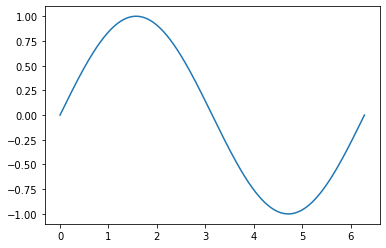

### Training for 20 epochs, training size = 500 cases
epoch    0: MSE=0.00052, RMSE=0.02286 =inf%
epoch    1: MSE=0.00052, RMSE=0.02286 =inf%
epoch    2: MSE=0.00052, RMSE=0.02285 =inf%
epoch    3: MSE=0.00052, RMSE=0.02284 =inf%
epoch    4: MSE=0.00052, RMSE=0.02283 =inf%
epoch    5: MSE=0.00052, RMSE=0.02281 =inf%
epoch    6: MSE=0.00052, RMSE=0.02279 =inf%
epoch    7: MSE=0.00052, RMSE=0.02278 =inf%
epoch    8: MSE=0.00052, RMSE=0.02275 =inf%
epoch    9: MSE=0.00052, RMSE=0.02273 =inf%
epoch   10: MSE=0.00052, RMSE=0.02270 =inf%
epoch   11: MSE=0.00051, RMSE=0.02267 =inf%
epoch   12: MSE=0.00051, RMSE=0.02264 =inf%
epoch   13: MSE=0.00051, RMSE=0.02261 =inf%
epoch   14: MSE=0.00051, RMSE=0.02258 =inf%
epoch   15: MSE=0.00051, RMSE=0.02254 =inf%
epoch   16: MSE=0.00051, RMSE=0.02251 =inf%
epoch   17: MSE=0.00051, RMSE=0.02248 =inf%
epoch   18: MSE=0.00050, RMSE=0.02244 =inf%
epoch   19: MSE=0.00050, RMSE=0.02240 =inf%


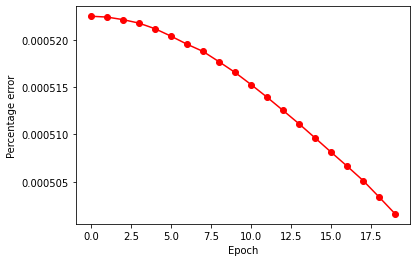

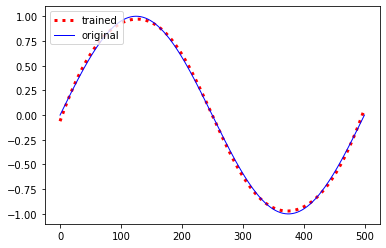

In [8]:
def sin(x):
    return np.sin(x)

def make_sin(batch_size=1024):
    '''
        Gera funcao seno
    '''

    x = torch.linspace(0, 2*np.pi, 500).reshape(-1, 1)
    y = torch.tensor([sin(p) for p in x], dtype=dtype).reshape(-1, 1)

    plt.plot(x, y)
    plt.show()

    td = TensorDataset(x, y)
    return DataLoader(td, batch_size=batch_size, shuffle=True)

def ex1_model():
    '''
        Define modelo e parametros para funcoes de pertinencia
    '''
    invardefs = [
            ('x0', make_bell_mfs(3.33333, 2, list(np.linspace(0, 2*np.pi, 3))))
            ]
    outvars = ['y0']

    anf = anfis.AnfisNet('Aproximacao senoidal', invardefs, outvars)
    return anf

if __name__ == '__main__':
    model = ex1_model()
    train_data = make_sin(batch_size = 100)
    train_anfis(model, train_data, 20, True)
    

Para um exemplo ruidoso, a implementação é análoga

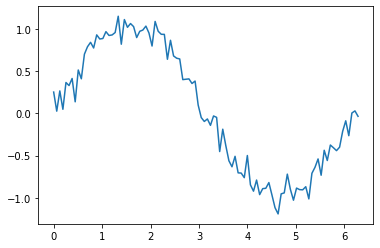

### Training for 20 epochs, training size = 100 cases
epoch    0: MSE=0.01226, RMSE=0.11072 =57.21%
epoch    1: MSE=0.01226, RMSE=0.11072 =57.21%
epoch    2: MSE=0.01226, RMSE=0.11072 =57.21%
epoch    3: MSE=0.01226, RMSE=0.11072 =57.21%
epoch    4: MSE=0.01226, RMSE=0.11072 =57.21%
epoch    5: MSE=0.01226, RMSE=0.11072 =57.21%
epoch    6: MSE=0.01226, RMSE=0.11072 =57.21%
epoch    7: MSE=0.01226, RMSE=0.11072 =57.21%
epoch    8: MSE=0.01226, RMSE=0.11072 =57.21%
epoch    9: MSE=0.01226, RMSE=0.11072 =57.21%
epoch   10: MSE=0.01226, RMSE=0.11072 =57.20%
epoch   11: MSE=0.01226, RMSE=0.11072 =57.20%
epoch   12: MSE=0.01226, RMSE=0.11072 =57.20%
epoch   13: MSE=0.01226, RMSE=0.11072 =57.20%
epoch   14: MSE=0.01226, RMSE=0.11072 =57.20%
epoch   15: MSE=0.01226, RMSE=0.11072 =57.20%
epoch   16: MSE=0.01226, RMSE=0.11072 =57.20%
epoch   17: MSE=0.01226, RMSE=0.11072 =57.20%
epoch   18: MSE=0.01226, RMSE=0.11072 =57.20%
epoch   19: MSE=0.01226, RMSE=0.11072 =57.20%


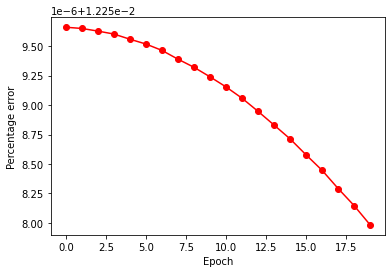

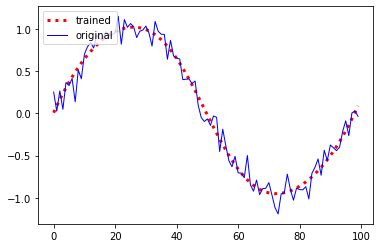

In [9]:
def noisy_sin(x):
    return np.sin(x) + 0.1 * np.random.normal(0, 1, 1)

def make_noisy_sin(batch_size=1024):
    '''
        Gera funcao seno
    '''

    x = torch.linspace(0, 2*np.pi, 100).reshape(-1, 1)
    y = torch.tensor([noisy_sin(p) for p in x], dtype=dtype).reshape(-1, 1)

    plt.plot(x, y)
    plt.show()

    td = TensorDataset(x, y)
    return DataLoader(td, batch_size=batch_size, shuffle=True)

if __name__ == '__main__':
    model = ex1_model()
    train_data = make_noisy_sin(batch_size = 100)
    train_anfis(model, train_data, 20, True)

Note que mesmo com entrada ruidosa, a curva gerada manteve o contorno senoidal.

# Previsão de uma Série Temporal

In [ ]:
""" Define-se inicialmente as rotinas de definição do conjunto de dados """


def training_data(batch_size = 1024):
    '''
        Gera os quatro instantes de dados e saida
    '''
    # loading data set
    data = loadmat('mg.mat')
    data = pd.DataFrame(data['x'])
    lendata = len(data)

    # 80%
    data = data.to_numpy()
    limit = int(0.8 * lendata)

    # quatro instantes e futuro
    train = np.zeros(shape = [limit - 18, 5])
    for idx, t in enumerate(range(18, limit)):
        train[idx, 0] = data[t - 18]
        train[idx, 1] = data[t - 12]
        train[idx, 2] = data[t - 6]
        train[idx, 3] = data[t - 0]
        train[idx, 4] = data[t + 6]

    # return train
    x = torch.tensor(train[:, 0:4])
    y = torch.tensor(train[:, 4])
    td = TensorDataset(x, y)
    return DataLoader(td, batch_size = batch_size, shuffle = True)

In [ ]:
def testing_data():
    '''
        Gera os quatro instantes de dados e saida
    '''
    # loading data set
    data = loadmat('mg.mat')
    data = pd.DataFrame(data['x'])
    lendata = len(data)

    # 20%
    data = data.to_numpy()
    limit = int(0.8 * lendata)

    # quatro instantes e futuro
    test = np.zeros(shape = [lendata - limit - 6, 5])
    for idx, t in enumerate(range(limit, lendata - 6)):
        test[idx, 0] = data[t - 18]
        test[idx, 1] = data[t - 12]
        test[idx, 2] = data[t - 6]
        test[idx, 3] = data[t - 0]
        test[idx, 4] = data[t + 6]

    # return test
    x = torch.tensor(test[:, 0:4])
    y = torch.tensor(test[:, 4])
    td = TensorDataset(x, y)
    return DataLoader(td)

In [12]:
""" Define-se o modelo em si """

def model():
    invardefs = [
        # ainda n escolhi os centros e sigma
        ('x(t-18)', make_gauss_mfs(sigma = 1.2, mu_list = [0, 1])),
        ('x(t-12)', make_gauss_mfs(sigma = 1.2, mu_list = [0, 1])),
        ('x(t-6)', make_gauss_mfs(sigma = 1.2, mu_list = [0, 1])),
        ('x(t)', make_gauss_mfs(sigma = 1.2, mu_list = [0, 1]))
        ]
    outvars = ['ys']

    model = anfis.AnfisNet('mackey-glass', invardefs, outvars)
    return model